In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '../model_code')
from kde import UnivariateKernelDensity
from matplotlib.pylab import subplots
import matplotlib.pyplot as plt
#plt.style.use('ggplot')

/Applications/anaconda/lib/python3.4/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [3]:
# Import data
data_pwt = pd.read_excel('pwt90.xlsx', sheetname='Data')
data = data_pwt[['countrycode', 'country', 'year', 'rgdpe', 'pop']]

In [4]:
#years = list(range(1970, 2011))
years = [1970, 1980, 1990, 2000, 2010, 2014]
data = data[data['year'].isin(years)].dropna()

In [5]:
data_pwt[data_pwt.country == 'China']

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k
2145,CHN,China,Yuan Renminbi,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2146,CHN,China,Yuan Renminbi,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2147,CHN,China,Yuan Renminbi,1952,5.154628e+05,5.098557e+05,566.207791,209.909363,NaN,1.110963,...,0.143538,0.003054,-0.002673,0.018363,0.044222,0.178765,0.045613,0.131387,0.206805,0.210654
2148,CHN,China,Yuan Renminbi,1953,5.661974e+05,5.597421e+05,575.722921,215.164993,NaN,1.123135,...,0.150690,0.002703,-0.002490,0.013531,0.048298,0.175157,0.049308,0.143727,0.215668,0.211214
2149,CHN,China,Yuan Renminbi,1954,5.780746e+05,5.705449e+05,586.103736,220.442505,NaN,1.135440,...,0.135654,0.003300,-0.002614,0.017996,0.048685,0.174668,0.049341,0.155788,0.206743,0.216762
2150,CHN,China,Yuan Renminbi,1955,6.112646e+05,6.039928e+05,597.934536,224.787506,NaN,1.147881,...,0.143179,0.002408,-0.002633,0.017223,0.050099,0.178149,0.049824,0.164590,0.205953,0.218905
2151,CHN,China,Yuan Renminbi,1956,6.540373e+05,6.446171e+05,610.160946,230.479996,NaN,1.161296,...,0.141157,0.003902,-0.002621,0.024107,0.052932,0.182215,0.051841,0.167112,0.208764,0.216159
2152,CHN,China,Yuan Renminbi,1957,7.101126e+05,6.995696e+05,624.035476,237.357498,NaN,1.174869,...,0.138942,0.003634,-0.002506,0.023250,0.050424,0.168732,0.048987,0.174236,0.203602,0.214274
2153,CHN,China,Yuan Renminbi,1958,7.892771e+05,7.777861e+05,637.328472,254.592499,NaN,1.188600,...,0.135201,0.003659,-0.002312,0.008786,0.052555,0.162276,0.050709,0.176633,0.223062,0.221714
2154,CHN,China,Yuan Renminbi,1959,7.884459e+05,7.771089e+05,644.863992,266.265015,NaN,1.202492,...,0.145720,0.004779,-0.002946,-0.019143,0.052571,0.158112,0.050536,0.176177,0.230288,0.228531


In [6]:
data

,countrycode,country,year,rgdpe,pop
20,ABW,Aruba,1970,349.120026,0.059065
30,ABW,Aruba,1980,830.096802,0.060096
40,ABW,Aruba,1990,2366.299072,0.062148
50,ABW,Aruba,2000,4001.630127,0.090858
60,ABW,Aruba,2010,3969.029053,0.101597
64,ABW,Aruba,2014,3924.260254,0.103441
85,AGO,Angola,1970,29908.927734,6.300969
95,AGO,Angola,1980,32147.099609,8.211950
105,AGO,Angola,1990,34150.984375,11.127870
115,AGO,Angola,2000,34137.144531,15.058638


In [7]:
sorted(data_pwt.country.unique())

['Albania',
 'Algeria',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'D.R. of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',


In [8]:
len(data.country.unique())

182

In [9]:
country_duplicates = {}
for country in data['countrycode'].unique():
    country_duplicates[country] = (
        list(data['countrycode']).count(country) == len(years)
    )

# Create list of the countries with entries for all specified years
countries = []
for country in sorted(country_duplicates.keys()):
    if country_duplicates[country] is True:
        countries.append(country)
    else:
        pass

print(
    'Number of countries with entries for all specified years:', len(countries)
)

Number of countries with entries for all specified years: 156


In [10]:
data['rgdpe_capita']=data['rgdpe']/data['pop']

In [11]:
data

,countrycode,country,year,rgdpe,pop,rgdpe_capita
20,ABW,Aruba,1970,349.120026,0.059065,5910.776697
30,ABW,Aruba,1980,830.096802,0.060096,13812.846142
40,ABW,Aruba,1990,2366.299072,0.062148,38075.224822
50,ABW,Aruba,2000,4001.630127,0.090858,44042.683385
60,ABW,Aruba,2010,3969.029053,0.101597,39066.400117
64,ABW,Aruba,2014,3924.260254,0.103441,37937.184036
85,AGO,Angola,1970,29908.927734,6.300969,4746.718756
95,AGO,Angola,1980,32147.099609,8.211950,3914.673081
105,AGO,Angola,1990,34150.984375,11.127870,3068.959682
115,AGO,Angola,2000,34137.144531,15.058638,2266.947684


In [12]:
data = data_pwt[['pop', 'country', 'year', 'rgdpe']]

In [13]:
gdp = data[data.year == 2000].dropna()
gdp.rgdpe = gdp.rgdpe.astype(float)

In [14]:
print(gdp.rgdpe)

50       4.001630e+03
115      3.413714e+04
180      2.752591e+02
245      1.520225e+04
310      3.057918e+05
375      5.258248e+05
440      8.886450e+03
505      1.182557e+03
570      6.754321e+05
635      2.976857e+05
700      2.144374e+04
765      3.999045e+03
830      3.640336e+05
895      1.011233e+04
960      1.234760e+04
1025     1.787649e+05
1090     6.971491e+04
1155     1.619467e+04
1220     8.331463e+03
1285     2.104189e+04
1350     7.992639e+04
1415     1.681156e+03
1480     2.522815e+03
1545     2.593526e+04
1610     1.516620e+06
1675     6.123812e+03
1740     1.726449e+04
1805     2.389332e+03
1870     1.782281e+04
1935     3.463773e+03
             ...     
9865     7.893191e+04
9930     4.517018e+04
9995     3.319960e+05
10060    8.046721e+03
10190    1.608140e+03
10255    2.497658e+04
10320    3.407994e+02
10385    1.004588e+04
10450    5.634896e+03
10515    4.599490e+05
10580    9.476917e+03
10645    3.659704e+04
10710    1.691235e+04
10775    7.895055e+04
10840    7

In [15]:
bw_methods = ["silverman", "lscv"]
pickeled_estimated_densities = {}
estimated_densities = {}

In [16]:
data_new = gdp['rgdpe']
kde = UnivariateKernelDensity(data=data_new, gridsize=100)

In [17]:
for i in sorted(bw_methods):
    kde(i)

    estimated_densities[i] = {
        'support': kde.support,
        'density': kde.estimated_density
    }

    print(kde.bw)

48888.02879814597
368843.239623


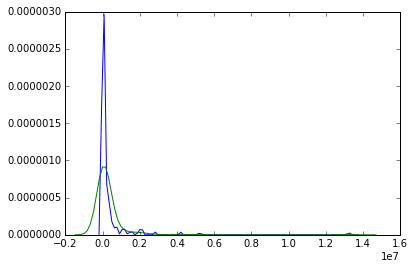

In [18]:
fig, ax = subplots()

for method in sorted(estimated_densities.keys()):
    ax.plot(
        estimated_densities[method]['support'],
        estimated_densities[method]['density']
    )

In [19]:
data

,pop,country,year,rgdpe
0,NaN,Aruba,1950,NaN
1,NaN,Aruba,1951,NaN
2,NaN,Aruba,1952,NaN
3,NaN,Aruba,1953,NaN
4,NaN,Aruba,1954,NaN
5,NaN,Aruba,1955,NaN
6,NaN,Aruba,1956,NaN
7,NaN,Aruba,1957,NaN
8,NaN,Aruba,1958,NaN
9,NaN,Aruba,1959,NaN


In [20]:
data['rgdpe_capita'] = data['rgdpe'] / data['pop']

/Applications/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
# Calculate total population.
population = {}
for year in list(range(1970, 2011)):
    population[year] = {}
    population[year] = sum(data[(data['year'] == year)]['pop'])

# Create new column in data frame containing the total population for a given
# year.
data['tot_pop'] = data['year']
data = data.replace({'tot_pop': population})

# Calculate weights.
data['pop_weights'] = data['pop'] / data['tot_pop']

# Add weighted GDP per worker to data set.
data['weighted_rgdpe'] = data['rgdpe_capita'] * data['pop_weights']

/Applications/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
data[data['year'] == 1970][['country','pop']]

,country,pop
20,Aruba,0.059065
85,Angola,6.300969
150,Anguilla,0.006400
215,Albania,2.150602
280,United Arab Emirates,0.235434
345,Argentina,23.973062
410,Armenia,NaN
475,Antigua and Barbuda,0.065369
540,Australia,12.904760
605,Austria,7.509746


In [23]:
population

{1970: nan,
 1971: nan,
 1972: nan,
 1973: nan,
 1974: nan,
 1975: nan,
 1976: nan,
 1977: nan,
 1978: nan,
 1979: nan,
 1980: nan,
 1981: nan,
 1982: nan,
 1983: nan,
 1984: nan,
 1985: nan,
 1986: nan,
 1987: nan,
 1988: nan,
 1989: nan,
 1990: nan,
 1991: nan,
 1992: nan,
 1993: nan,
 1994: nan,
 1995: nan,
 1996: nan,
 1997: nan,
 1998: nan,
 1999: nan,
 2000: nan,
 2001: nan,
 2002: nan,
 2003: nan,
 2004: nan,
 2005: 6423.6922319999976,
 2006: 6502.5651449999987,
 2007: 6582.4382529999984,
 2008: 6663.0833710000006,
 2009: 6744.3621870000025,
 2010: 6826.0783420000043}

In [24]:
data_pwt[data_pwt['country']=='Armenia']

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k
390,ARM,Armenia,Armenian Dram,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,ARM,Armenia,Armenian Dram,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,ARM,Armenia,Armenian Dram,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,ARM,Armenia,Armenian Dram,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,ARM,Armenia,Armenian Dram,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,ARM,Armenia,Armenian Dram,1955,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,ARM,Armenia,Armenian Dram,1956,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,ARM,Armenia,Armenian Dram,1957,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,ARM,Armenia,Armenian Dram,1958,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,ARM,Armenia,Armenian Dram,1959,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data_pwt[data_pwt['year']==1970]['pop']

20         0.059065
85         6.300969
150        0.006400
215        2.150602
280        0.235434
345       23.973062
410             NaN
475        0.065369
540       12.904760
605        7.509746
670             NaN
735        3.457113
800        9.664320
865        2.907769
930        5.624597
995       65.048701
1060       8.494765
1125       0.213102
1190       0.169356
1255            NaN
1320            NaN
1385       0.122179
1450       0.052286
1515       4.505774
1580      95.982453
1645       0.238847
1710       0.129729
1775       0.291457
1840       0.693021
1905       1.828710
            ...    
9900            NaN
9965       8.049049
10030      0.445844
10095           NaN
10160      0.052364
10225      6.378802
10290      0.005632
10355      3.644911
10420      2.115521
10485     36.884914
10550           NaN
10615           NaN
10680      0.945996
10745      5.060393
10810     34.772031
10875     14.582944
10940     13.605504
11005      9.446024
11070           NaN


In [25]:
# Specify bandwidth selection methods to be used in estimation.
bw_methods = ['lscv']

# Estimate the densities for the different years and bandwidth selection
# methods.
estimated_densities_weighted = {}

for year in years:
    # Create dictionary entry for year.
    estimated_densities_weighted[year] = {}

    # Restrict data to specified year.
    data_weighted_yearly = data[data['year'] == year].weighted_rgdpe

    # Initialise the kernel density estimator.
    kde = UnivariateKernelDensity(data=data_weighted_yearly)

    for bandwidth in sorted(bw_methods):
        kde(bandwidth, stretch=2.9)

        # Save the estimated density and corresponding support in dictionary
        estimated_densities_weighted[year][bandwidth] = {
            'support': list(kde.support),
            'density': list(kde.estimated_density)
        }

/Applications/anaconda/lib/python3.4/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in (function (x, nb = 1000L, lower = 0.1 * hmax, upper = hmax, tol = 0.1 *  : 
  non-finite x[1] in bandwidth calculation

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Applications/anaconda/lib/python3.4/site-packages/rpy2/robjects/functions.py:106: UserWarning: In addition: 
  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Applications/anaconda/lib/python3.4/site-packages/rpy2/robjects/functions.py:106: UserWarning: There were 50 or more warnings (use warnings() to see the first 50)
  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Applications/anaconda/lib/python3.4/site-packages/rpy2/robjects/functions.py:106: UserWarning: 

  res = super(Function, self).__call__(*new_args, **new_kwargs)


RRuntimeError: Error in (function (x, nb = 1000L, lower = 0.1 * hmax, upper = hmax, tol = 0.1 *  : 
  non-finite x[1] in bandwidth calculation
